Mean Squared Error: 0.35
R-squared (R2) Score: 0.46


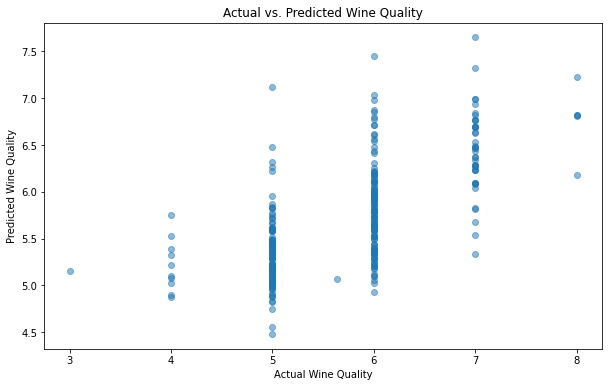

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

data = pd.read_excel(r'C:\Users\Dr. Neeta Bisht\Downloads\1788410-1767134-1729261-1613779-Red_wine__(1).xlsx')

# Handle missing values by filling NaN values with the mean of each column
data = data.fillna(data.mean())

# Split the dataset into features (X) and target (y)
X = data.drop('quality', axis=1)
y = data['quality']

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Outlier Detection using Isolation Forest
iso_forest = IsolationForest(contamination=0.05, random_state=42)
outliers_train = iso_forest.fit_predict(X_train)

# Keep the inliers (not outliers)
X_train_inliers = X_train[outliers_train == 1]
y_train_inliers = y_train[outliers_train == 1]

# Feature Selection using Random Forest
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train_inliers, y_train_inliers)

# Get feature importances
feature_importances = rf.feature_importances_

# Select top k features (here I used 5 (can adjust))
k = 5
selected_features = X_train_inliers.columns[np.argsort(feature_importances)[-k:]]

# Train a model using the selected features
X_train_selected = X_train_inliers[selected_features]
X_test_selected = X_test[selected_features]

# Train a Random Forest regression model on the selected features
regressor = RandomForestRegressor(n_estimators=100, random_state=42)
regressor.fit(X_train_selected, y_train_inliers)

# Make predictions on the test set
y_pred = regressor.predict(X_test_selected)

# Evaluate the regression model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared (R2) Score: {r2:.2f}")

# Visualize the results
plt.figure(figsize=(10, 6))

# Plot actual vs. predicted values
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel('Actual Wine Quality')
plt.ylabel('Predicted Wine Quality')
plt.title('Actual vs. Predicted Wine Quality')
plt.show()